## Cognitive Models for El Farol
---

In [1]:
import ElFarol as ef
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from itertools import product
import ast
from copy import deepcopy

In [2]:
# Edit the font, font size, and axes width

mpl.rcParams['font.family'] = 'Avenir LT Std'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

In [3]:
def measurements(df_in):
    df = df_in.copy()
    eff = df.score.mean()

    df['winner'] = df.groupby('round')['score'].transform(winner)
    
    if 'a' in df['winner'].unique():
        ro1_p = df['winner'].value_counts()['a']
    else: 
        ro1_p = 0
    
    if 'b' in df['winner'].unique():
        ro2_p = df['winner'].value_counts()['b']
    else: 
        ro2_p = 0
    fairness = min(ro1_p, ro2_p)/max(ro1_p, ro2_p)
    return (eff, fairness)

In [4]:
def winner(l):
    if np.argmax(l) == 0:
        return 'a'
    else:
        return 'b'

In [7]:
def export_measurements(max_trials=50, num_it_model=100, model='random', params_list=[[0.4],[0.5],[0.6]]):
    for par in params_list:
        dict_df = {}
        params = []
        trial = []
        eff = []
        fairness = []
        tmp = []
        params += [par]*max_trials
        print(f'Running simulation with model {model} and parameters {par}...')
        for i in range(max_trials):
            trial.append(i)
            bar = ef.BarElFarol(num_agents=2, threshold=0.6, model=model)
            DEB=False
            num_it = 100
            model = model
            parameters = par
            for t in range(num_it_model) : 
                bar.compute_attendance()
                bar.compute_scores()
                if DEB :
                    bar.print_round(t)
                bar.agents_decide(model=model, params=par, DEB=DEB)
            DF1 = bar.save_pandas()
            meas = measurements(DF1)
            eff.append(meas[0]) 
            fairness.append(meas[1])
            DF1['tmp'] = [i]*(num_it_model*2)
            tmp.append(DF1)
            
        dict_df['params'] = params
        dict_df['trial'] = trial
        dict_df['eff'] = eff
        dict_df['fairness'] = fairness
        
        p = '_'.join([str(x) for x in par])
        
        DF2 = pd.DataFrame.from_dict(dict_df)
        DF1_c = pd.concat(tmp)
        DF2['tmp'] = DF1['tmp']
        fin_df = pd.merge(DF1, DF2, on=['tmp'])
        fin_df = fin_df.drop('tmp', axis=1)
        fin_df.to_csv(f'./model_measurements/{model}/{model}_{p}.csv')
        
def read_models(params_list, model_in):
    list_df = []
    for par in params_list:
        p = '_'.join([str(x) for x in par])
        f_name = f'./model_measurements/{model_in}/{model_in}_{p}.csv'
        test_exp = pd.read_csv(f_name, index_col=0)
        list_df.append(test_exp) 
    df_models = pd.concat(list_df)
    return df_models

In [8]:
params_list=[[0.1], [0.2], [0.4], [0.6]]
model_in = 'belletal'
data_exported = export_measurements(model=model_in, params_list=params_list)

Running simulation with model belletal and parameters [0.1]...
Running simulation with model belletal and parameters [0.2]...
Running simulation with model belletal and parameters [0.4]...
Running simulation with model belletal and parameters [0.6]...


#### Random

In [59]:
params_list=[[0.1], [0.2], [0.3], [0.4], [0.5], [0.6]]
model_in = 'random'
df_models = read_models(params_list, model_in)

(0.0, 0.65)

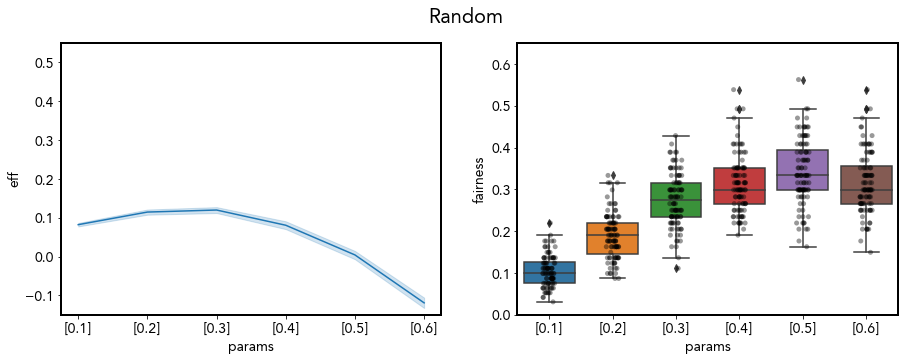

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.lineplot(data=df_models, x='params', y='eff', ax=ax1)
sns.boxplot(data=df_models, x='params', y='fairness', ax=ax2)
sns.stripplot(data=df_models, x='params', y='fairness', ax=ax2, color='black', alpha=0.4)
plt.suptitle('Random', fontsize=20)
ax1.set_ylim([-0.15, 0.55])
ax2.set_ylim([0, 0.65])

#### Belletal

In [56]:
params_list = [[0.1],[0.2], [0.4], [0.6], [0.8],[0.9], [1]]
model_in = 'belletal'
df_models = read_models(params_list, model_in)

(0.0, 0.65)

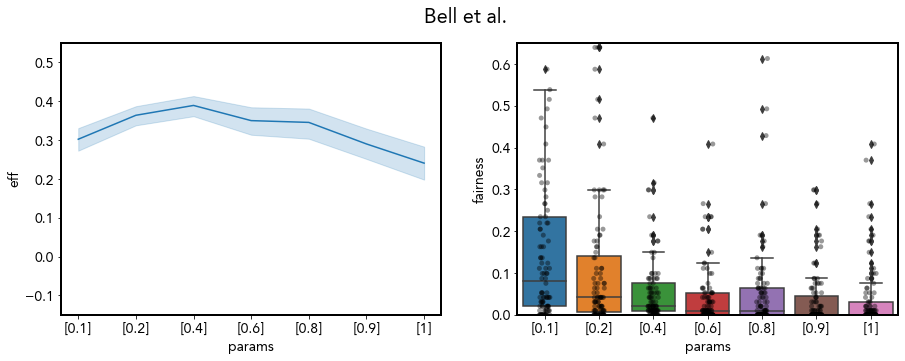

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.lineplot(data=df_models, x='params', y='eff', ax=ax1)

sns.boxplot(data=df_models, x='params', y='fairness', ax=ax2)
sns.stripplot(data=df_models, x='params', y='fairness', ax=ax2, color='black', alpha=0.4)
plt.suptitle('Bell et al.', fontsize=20)
ax1.set_ylim([-0.15, 0.55])
ax2.set_ylim([0, 0.65])

#### Win Stay Lose Shift

In [53]:
model_in = 'win-stay-lose-shift'
params_list = [[0], [0.05], [0.1], [0.15], [0.2]]
df_models = read_models(params_list, model_in)

(0.0, 0.65)

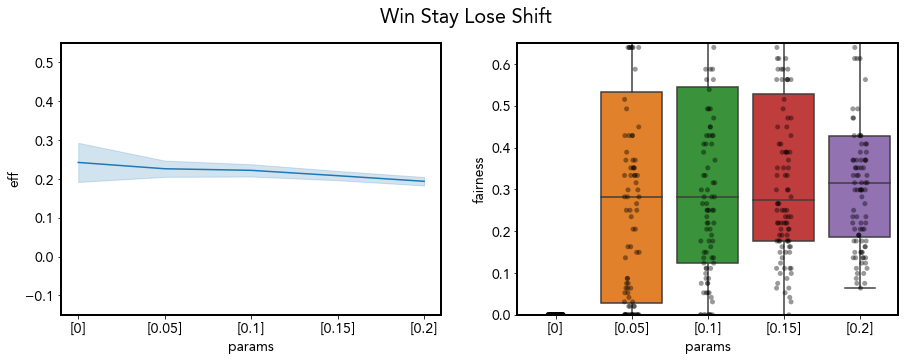

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.lineplot(data=df_models, x='params', y='eff', ax=ax1)

sns.boxplot(data=df_models, x='params', y='fairness', ax=ax2)
sns.stripplot(data=df_models, x='params', y='fairness', ax=ax2, color='black', alpha=0.4)
plt.suptitle('Win Stay Lose Shift', fontsize=20)
ax1.set_ylim([-0.15, 0.55])
ax2.set_ylim([0, 0.65])

#### P-self

In [61]:
vals = [0.1,0.2,0.8,0.9]
prods = product(vals, repeat=2)
params_list = [list(x) for x in prods]
model_in = 'p-self'
df_models = read_models(params_list, model_in)

In [62]:
n_df_models = deepcopy(df_models)

x_l = []
y_l = []
for index, row in n_df_models.iterrows():
    x_l.append(ast.literal_eval(row.params)[-2])
    y_l.append(ast.literal_eval(row.params)[-1])
    
n_df_models['x_l'] = x_l
n_df_models['y_l'] = y_l

In [63]:
view_eff = n_df_models[['x_l', 'y_l', 'eff']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'eff')
view_fair = n_df_models[['x_l', 'y_l', 'fairness']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'fairness')

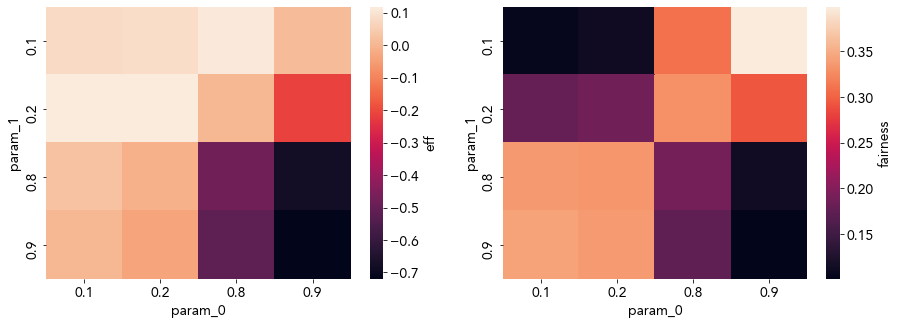

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.heatmap(view_eff, ax=ax1, cbar_kws={'label': 'eff'})
sns.heatmap(view_fair, ax=ax2, cbar_kws={'label': 'fairness'})

ax1.set(xlabel='param_0')
ax1.set(ylabel='param_1')
ax2.set(xlabel='param_0')
ax2.set(ylabel='param_1')

plt.show()

#### P-partner

In [23]:
vals1 = [0,0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1]
vals2 = [1-x for x in vals1]
vals2 = [round(x, 2) for x in vals2]
prods = product(vals1, vals2)
params_list = [list(x) for x in prods]
model_in = 'p-partner'
df_models = read_models(params_list, model_in)

In [28]:
model_in='p-partner'
vals = [0,0.2,0.4,0.6,0.8,1]
prods = product(vals, repeat=2)
params_list = [list(x) for x in prods]
df_models = read_models(params_list, model_in)

In [29]:
n_df_models = deepcopy(df_models)

x_l = []
y_l = []
for index, row in n_df_models.iterrows():
    x_l.append(ast.literal_eval(row.params)[-2])
    y_l.append(ast.literal_eval(row.params)[-1])
    
n_df_models['x_l'] = x_l
n_df_models['y_l'] = y_l

In [30]:
view_eff = n_df_models[['x_l', 'y_l', 'eff']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'eff')
view_fair = n_df_models[['x_l', 'y_l', 'fairness']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'fairness')

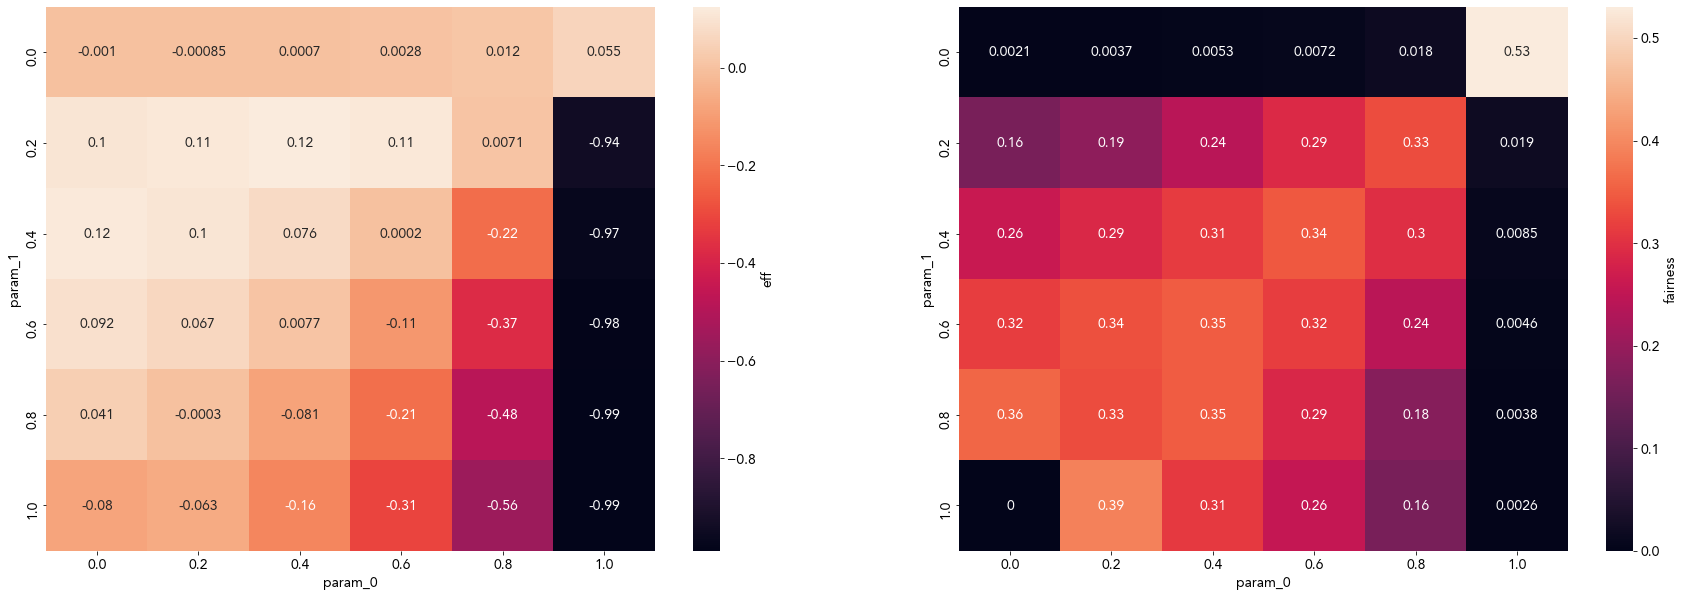

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30, 10))
sns.heatmap(view_eff, ax=ax1, cbar_kws={'label': 'eff'}, annot=True)
sns.heatmap(view_fair, ax=ax2, cbar_kws={'label': 'fairness'}, annot=True)

ax1.set(xlabel='param_0')
ax1.set(ylabel='param_1')
ax2.set(xlabel='param_0')
ax2.set(ylabel='param_1')

plt.show()

#### P-mixed

In [33]:
def trans_list_hm(row, fixed, mode):
    if mode == 'partner':
        i = 0
        y = 2
    elif mode == 'self':
        i = 1
        y = 3    
    
    if ast.literal_eval(row.params)[i] == fixed[0] and ast.literal_eval(row.params)[y] == fixed[1]:
        return True
    else:
        return False

In [34]:
def plot_p_mixed_heatmap(df_models, mode, fixed_par=[0.1,0.9], multiplot=False, axes=None):
    
    if mode == 'self':
        i = 0
        y = 2
    elif mode == 'partner':
        i = 1
        y = 3    
        
    m = df_models.apply(trans_list_hm, axis=1, fixed=fixed_par, mode=mode)
    n_df_models = deepcopy(df_models[m])
        
    x_l = []
    y_l = []
    for index, row in n_df_models.iterrows():
        x_l.append(ast.literal_eval(row.params)[i])
        y_l.append(ast.literal_eval(row.params)[y])

    n_df_models['x_l'] = x_l
    n_df_models['y_l'] = y_l
    
    view_eff = n_df_models[['x_l', 'y_l', 'eff']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'eff')
    view_fair = n_df_models[['x_l', 'y_l', 'fairness']].groupby(['x_l', 'y_l']).mean().reset_index().pivot('y_l', 'x_l', 'fairness')

    if multiplot:
        ax1 = axes[0]; ax2 = axes[1];
        ax1.yaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax1.yaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        ax2.xaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax2.xaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        print('here')
        sns.heatmap(view_eff, ax=ax1, cbar_kws={'label': 'eff'},  vmin=0, vmax=0.5)
        sns.heatmap(view_fair, ax=ax2, cbar_kws={'label': 'fairness'},  vmin=0, vmax=1)
        ax1.set_title(f'{mode}, {fixed_par}', fontweight='bold', loc='left')
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
        ax1.yaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax1.yaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        ax2.xaxis.set_tick_params(which='major', size=6, width=0.5, direction='out')
        ax2.xaxis.set_tick_params(which='minor', size=3, width=0.5, direction='out')
        sns.heatmap(view_eff, ax=ax1, cbar_kws={'label': 'eff'}, annot=True, vmin=0, vmax=0.5)
        sns.heatmap(view_fair, ax=ax2, cbar_kws={'label': 'fairness'}, annot=True, vmin=0, vmax=1)
        fig.suptitle(f'{mode}, {fixed_par}')

    ax1.set(xlabel=f'$\gamma_{i+1}$')
    ax1.set(ylabel=f'$\gamma_{y+1}$')
    ax2.set(xlabel=f'$\gamma_{i+1}$')
    ax2.set(ylabel=f'$\gamma_{y+1}$')

    
    return (ax1, ax2)
    #plt.show()

In [35]:
vals = [0.1,0.2,0.8,0.9]
prods = product(vals, repeat=4)
params_list = [list(x) for x in prods]
model_in = 'p-mixed'
df_models = read_models(params_list, model_in)

(<AxesSubplot:xlabel='$\\gamma_2$', ylabel='$\\gamma_4$'>,
 <AxesSubplot:xlabel='$\\gamma_2$', ylabel='$\\gamma_4$'>)

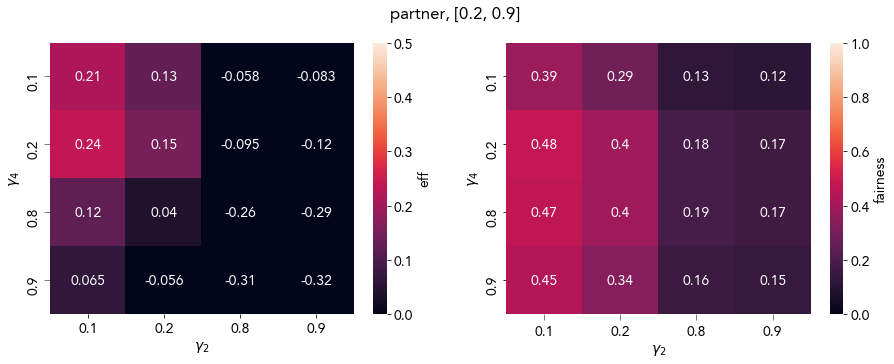

In [36]:
plot_p_mixed_heatmap(df_models, mode='partner', fixed_par=[0.2,0.9])

(<AxesSubplot:xlabel='$\\gamma_2$', ylabel='$\\gamma_4$'>,
 <AxesSubplot:xlabel='$\\gamma_2$', ylabel='$\\gamma_4$'>)

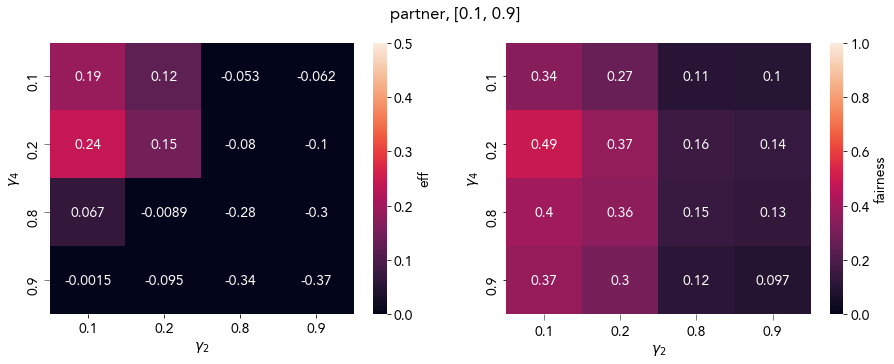

In [37]:
plot_p_mixed_heatmap(df_models, mode='partner', fixed_par=[0.1,0.9])

(<AxesSubplot:xlabel='$\\gamma_1$', ylabel='$\\gamma_3$'>,
 <AxesSubplot:xlabel='$\\gamma_1$', ylabel='$\\gamma_3$'>)

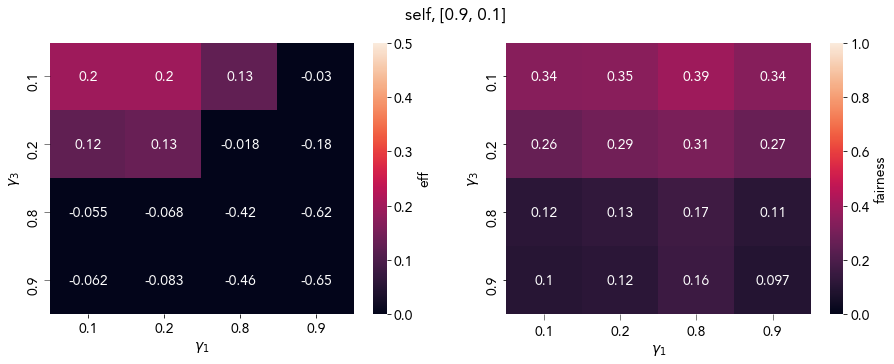

In [38]:
plot_p_mixed_heatmap(df_models, mode='self', fixed_par=[0.9,0.1])

In [71]:
plot_p_mixed_heatmap(df_models, mode='self', fixed_par=[0.2,0.1])

IndexError: list index out of range

[0.1, 0.1]


IndexError: list index out of range

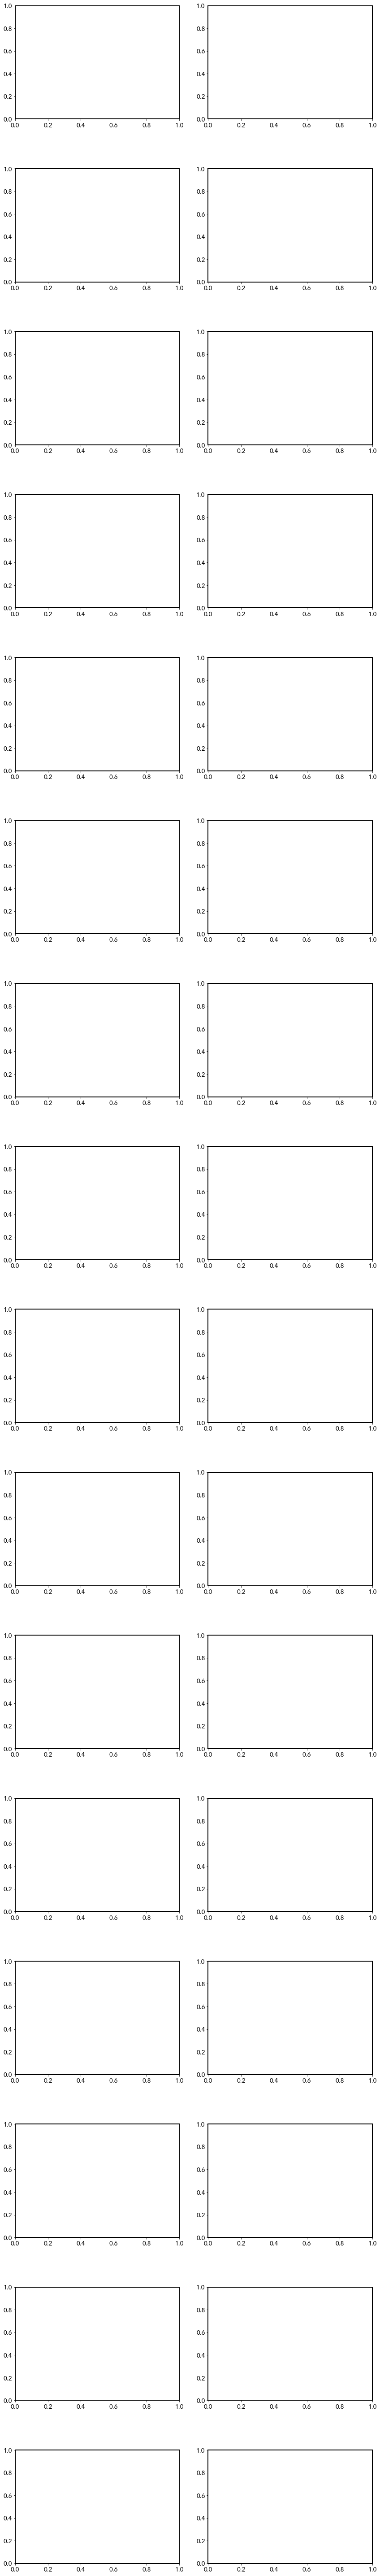

In [68]:
import matplotlib.gridspec as gridspec
mode = 'partner'
vals = [0.1,0.2,0.8,0.9]
prods = product(vals, repeat=2)
params_list = [list(x) for x in prods]

nrow = 16; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12,80))
fig.tight_layout(h_pad=6, w_pad=2)
for i in range(nrow):
    print(f_pars)
    f_pars = params_list[i]
    axes_hm = plot_p_mixed_heatmap(df_models, mode=mode, fixed_par=f_pars, multiplot=True, axes=(axs[i,0], axs[i,1]))                                   
plt.savefig('figures/heatmaps_p-mixed.pdf', dpi=300, transparent=False, bbox_inches='tight')